In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("train.csv")

In [10]:
data.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [11]:
data.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1027.500000,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,593.660397,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,0.000000,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,513.750000,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,1027.500000,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,1541.250000,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,2055.000000,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


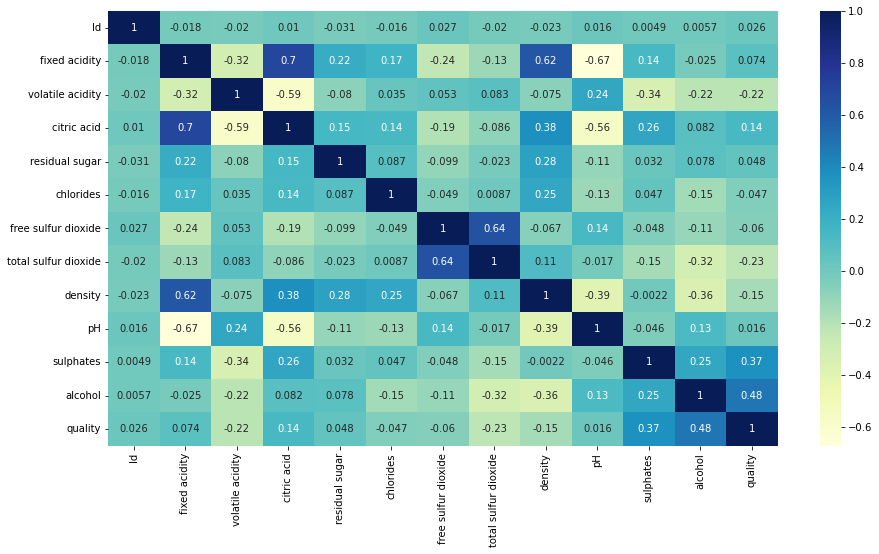

In [12]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.show()

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

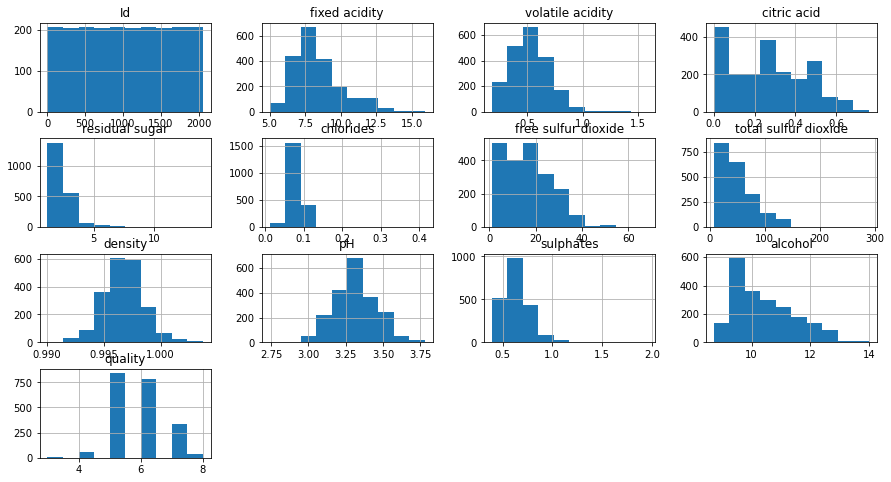

In [13]:
data.hist(figsize=(15,8))

In [14]:
x, y = data.drop(["quality"],axis=1), data["quality"]
x=x.drop(["Id"],axis=1)
x=x.drop(["fixed acidity"],axis=1)
x=x.drop(["residual sugar"],axis=1)
x=x.drop(["free sulfur dioxide"],axis=1)
x=x.drop(["chlorides"],axis=1)
x=x.drop(["pH"],axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
#transformed histogram and normal probability plot
sns.distplot(x["volatile acidity"], fit=norm)
fig = plt.figure()
res = stats.probplot(x['volatile acidity'], plot=plt)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2)

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [95]:
from sklearn.metrics import cohen_kappa_score, mean_squared_error
print("score",cohen_kappa_score(y_test,model.predict(x_test)))
print("Bias", mean_squared_error(y_train,model.predict(x_train)) )
print("Variance:", (np.var(model.predict(x_train))))

score 0.3200946146652731
Bias 0.0
Variance: 0.7143202295747716


In [62]:
x_data= pd.read_csv("test.csv")
submission=pd.DataFrame(x_data['Id'])
x_data=x_data.drop(["Id"],axis=1)
x_data=x_data.drop(["fixed acidity"],axis=1)
x_data=x_data.drop(["residual sugar"],axis=1)
x_data=x_data.drop(["free sulfur dioxide"],axis=1)
x_data=x_data.drop(["chlorides"],axis=1)
x_data=x_data.drop(["pH"],axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)


sub=model.predict(x_data)
submission["quality"] = pd.DataFrame(sub)
submission.head()

,Id,quality
0,2056,5
1,2057,5
2,2058,6
3,2059,6
4,2060,5


In [63]:
submission.to_csv('submission7.csv',index=False)